# Recommender system
## Books for mystery, thriller, and crime
https://sites.google.com/eng.ucsd.edu/ucsdbookgraph/home

In [2]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

import pandas as pd
import numpy as np

### Load Data

#### 1) General information for all books

In [67]:
book_id_df = pd.read_csv('book_id_map.csv')
print(book_id_df.shape)
book_id_df.head(3)

(2360650, 2)


,book_id_csv,book_id
0,0,34684622
1,1,34536488
2,2,34017076


In [3]:
user_id_df = pd.read_csv('user_id_map.csv')
print(user_id_df.shape)
user_id_df.head(3)

(876145, 2)


,user_id_csv,user_id
0,0,8842281e1d1347389f2ab93d60773d4d
1,1,72fb0d0087d28c832f15776b0d936598
2,2,ab2923b738ea3082f5f3efcbbfacb218


In [4]:
authors_df = pd.read_csv('goodreads_book_authors.csv')
print(authors_df.shape)
authors_df.head(3)

(829529, 5)


,author_id,average_rating,name,ratings_count,text_reviews_count
0,604031,3.98,Ronald J. Fields,49,7
1,626222,4.08,Anita Diamant,546796,28716
2,10333,3.92,Barbara Hambly,122118,5075


In [5]:
all_interactions_df = pd.read_csv('goodreads_interactions.csv')
print(all_interactions_df.shape)
all_interactions_df.head(3)

(228170405, 5)


,user_id,book_id,is_read,rating,is_reviewed
0,0,948,1,5.0,0.0
1,0,947,1,5.0,1.0
2,0,946,1,5.0,0.0


#### 2) Specific information for mystery, thriller, and crim books

In [96]:
books_df = pd.read_csv('goodreads_books_mystery_thriller_crime.csv')
books_df.authors = books_df.authors.str.split(pat = ",").str[0].str.split(pat=":").str[1].str.split(pat="'").str[1]
books_df = books_df.rename(columns={'authors': 'author_id'})
books_df.similar_books = books_df.similar_books.str.replace("^\[|\]$","")
print(books_df.shape)
books_df.head(3)

(219235, 29)


,asin,author_id,average_rating,book_id,country_code,description,edition_information,format,image_url,is_ebook,...,publication_year,publisher,ratings_count,series,similar_books,text_reviews_count,title,title_without_series,url,work_id
0,NaN,37778,3.93,6066814,US,"London, 1196. At the command of Richard the Li...",NaN,Hardcover,https://images.gr-assets.com/books/1328724803m...,False,...,2009.0,Simon & Schuster UK,186,['169353'],"'439108', '522621', '116770', '1275927', '6202...",15,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)",https://www.goodreads.com/book/show/6066814-cr...,6243149
1,B01NCIKAQX,242185,4.33,33394837,US,NaN,NaN,NaN,https://images.gr-assets.com/books/1493114742m...,True,...,NaN,NaN,269,['1052227'],,60,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2),https://www.goodreads.com/book/show/33394837-t...,54143148
2,B01ALOWJN0,15104629,3.49,29074697,US,"BATHS, BANKS AND ROMAN INSURRECTION\nDetective...",NaN,NaN,https://s.gr-assets.com/assets/nophoto/book/11...,True,...,NaN,Amazon Digital Services,192,['953679'],,23,The Slaughtered Virgin of Zenopolis (Inspector...,The Slaughtered Virgin of Zenopolis (Inspector...,https://www.goodreads.com/book/show/29074697-t...,49305010


In [46]:
interactions_df = pd.read_csv('goodreads_interactions_mystery_thriller_crime.csv')
print(interactions_df.shape)
interactions_df.head(3)

(24799896, 10)


,book_id,date_added,date_updated,is_read,rating,read_at,review_id,review_text_incomplete,started_at,user_id
0,6392944,Mon Jul 24 02:48:17 -0700 2017,Sun Jul 30 09:28:03 -0700 2017,True,3,Tue Jul 25 00:00:00 -0700 2017,5e212a62bced17b4dbe41150e5bb9037,I haven't read a fun mystery book in a while a...,Mon Jul 24 00:00:00 -0700 2017,8842281e1d1347389f2ab93d60773d4d
1,2279538,Wed Mar 29 00:27:14 -0700 2017,Wed Mar 29 00:27:14 -0700 2017,False,0,NaN,556e9e3f00fb5b7e4eaa116764b771b0,NaN,NaN,8842281e1d1347389f2ab93d60773d4d
2,20821043,Mon Mar 27 22:52:11 -0700 2017,Mon Mar 27 22:52:12 -0700 2017,False,0,NaN,4b15f8a08f04a17f9a47f2b76fec21e5,NaN,NaN,8842281e1d1347389f2ab93d60773d4d


In [8]:
reviews_df = pd.read_csv('goodreads_reviews_mystery_thriller_crime.csv')
print(reviews_df.shape)
reviews_df.head(3)

(1849236, 11)


,book_id,date_added,date_updated,n_comments,n_votes,rating,read_at,review_id,review_text,started_at,user_id
0,6392944,Mon Jul 24 02:48:17 -0700 2017,Sun Jul 30 09:28:03 -0700 2017,0,6,3,Tue Jul 25 00:00:00 -0700 2017,5e212a62bced17b4dbe41150e5bb9037,I haven't read a fun mystery book in a while a...,Mon Jul 24 00:00:00 -0700 2017,8842281e1d1347389f2ab93d60773d4d
1,28684704,Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,0,22,3,Sat Mar 18 23:22:42 -0700 2017,2ede853b14dc4583f96cf5d120af636f,"A fun, fast paced science fiction thriller. I ...",Fri Mar 17 23:45:40 -0700 2017,8842281e1d1347389f2ab93d60773d4d
2,32283133,Tue Nov 01 11:09:18 -0700 2016,Tue Nov 01 11:09:44 -0700 2016,0,9,0,NaN,8e4d61801907e591018bdc3442a9cf2b,http://www.telegraph.co.uk/culture/10...,NaN,8842281e1d1347389f2ab93d60773d4d


### Data Exploration

In [9]:
books = books_df[['book_id', 'author_id', 'average_rating', 'num_pages', 'description', 'similar_books', 'title']]
books.sample(5)

,book_id,author_id,average_rating,num_pages,description,similar_books,title
67177,12961994,33031,3.97,372.0,A major inquiry into a neighboring police forc...,"'8216274', '6353455', '11156902', '7593288', '...",The Impossible Dead
4156,2199212,3324,2.61,213.0,NaN,,Ciudadano Max...
198435,24123354,4624490,3.76,NaN,"Suspense, fear and the supernatural provide th...","'8579173', '1872567', '6397619', '6597221', '1...",The Facts In The Case Of M. Valdemar: Short Story
41922,17331773,604905,4.23,332.0,Joe and Kabe must lay the ghosts of the past a...,"'15706627', '5958281', '18333332', '17569268',...","Laying Ghosts (Deputy Joe, #3)"
4062,17794984,328707,3.82,464.0,From the author of the breakthrough crime debu...,"'15799052', '16087137', '13643038', '17447624'...","Original Skin (Aector McAvoy, #2)"


In [10]:
books.describe()

,book_id,average_rating,num_pages
count,2.192350e+05,219235.000000,149407.000000
mean,1.517214e+07,3.831517,317.769984
std,1.057262e+07,0.332023,224.919711
min,1.640000e+02,0.000000,0.000000
25%,6.339338e+06,3.650000,236.000000
50%,1.573438e+07,3.850000,313.000000
75%,2.360379e+07,4.040000,391.000000
max,3.651716e+07,5.000000,52015.000000


In [11]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219235 entries, 0 to 219234
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   book_id         219235 non-null  int64  
 1   author_id       219235 non-null  object 
 2   average_rating  219235 non-null  float64
 3   num_pages       149407 non-null  float64
 4   description     198488 non-null  object 
 5   similar_books   219235 non-null  object 
 6   title           219235 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.7+ MB


In [12]:
books.isnull().sum(axis=0)

book_id               0
author_id             0
average_rating        0
num_pages         69828
description       20747
similar_books         0
title                 0
dtype: int64

In [13]:
print("Number of books: ", books.book_id.nunique())
print("Number of authors: ", books.author_id.nunique())

Number of books:  219235
Number of authors:  31761


In [14]:
interactions = interactions_df[['book_id', 'user_id', 'rating', 'is_read', 'read_at']]
interactions.sample(5)

,book_id,user_id,rating,is_read,read_at
22478984,13158512,e988954248ff709d7738df7cd9d5b101,0,False,NaN
7728586,17857787,8684cc5b9aa70a53538e3d50a7b9188d,0,False,NaN
10510478,12617919,2730b44ffa3ba287337765f61685c201,2,True,NaN
14004239,16071701,74c6ed6ff0591046fdc0349c70c51d86,0,False,NaN
22894982,278797,cf446069728321b3ac00ad45676f5698,2,True,Mon Feb 17 04:38:34 -0800 2014


In [15]:
interactions.describe()

,book_id,rating
count,2.479990e+07,2.479990e+07
mean,1.075371e+07,1.819287e+00
std,1.081314e+07,2.029919e+00
min,1.640000e+02,0.000000e+00
25%,2.245200e+05,0.000000e+00
50%,7.738919e+06,0.000000e+00
75%,1.915523e+07,4.000000e+00
max,3.649690e+07,5.000000e+00


In [16]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24799896 entries, 0 to 24799895
Data columns (total 5 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   book_id  int64 
 1   user_id  object
 2   rating   int64 
 3   is_read  bool  
 4   read_at  object
dtypes: bool(1), int64(2), object(2)
memory usage: 780.5+ MB


In [17]:
interactions.isnull().sum(axis=0)

book_id           0
user_id           0
rating            0
is_read           0
read_at    19230769
dtype: int64

In [18]:
print("Number of books: ", interactions.book_id.nunique())
print("Number of users: ", interactions.user_id.nunique())

Number of books:  219234
Number of users:  676075


In [19]:
reviews = reviews_df[['book_id', 'user_id', 'rating', 'read_at', 'review_text']]
reviews.sample(5)

,book_id,user_id,rating,read_at,review_text
895693,23341578,de174d106b15f55a971d15d7a868079c,1,NaN,WORST BOOK EVER \n I tried to read this book a...
1581944,26109394,a144a0f846ea427df454278c29dd4559,3,Mon May 09 00:00:00 -0700 2016,2.5 stars. \n i love coben's shocking twists. ...
1413040,28815474,5aaf176f1255693bddebe40dd10150d6,2,Mon Jan 09 00:00:00 -0800 2017,"Oh, the writing. When an author uses the main ..."
234806,29405838,6e48e90b27a0b444115db789af09c899,3,Sun Mar 27 20:45:11 -0700 2016,"A fair read \n A little new,a lot old as far a..."
47844,22171558,49a744b185c182d4840c7feeaefbea6f,2,NaN,Got a little irritated with the characters/pac...


In [20]:
reviews.describe()

,book_id,rating
count,1.849236e+06,1.849236e+06
mean,1.335371e+07,3.683981e+00
std,1.063012e+07,1.208838e+00
min,1.640000e+02,0.000000e+00
25%,1.914973e+06,3.000000e+00
50%,1.309420e+07,4.000000e+00
75%,2.255727e+07,5.000000e+00
max,3.649690e+07,5.000000e+00


In [21]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1849236 entries, 0 to 1849235
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   book_id      int64 
 1   user_id      object
 2   rating       int64 
 3   read_at      object
 4   review_text  object
dtypes: int64(2), object(3)
memory usage: 70.5+ MB


In [22]:
reviews.isnull().sum(axis=0)

book_id             0
user_id             0
rating              0
read_at        281802
review_text       426
dtype: int64

In [23]:
print("Number of books: ", reviews.book_id.nunique())
print("Number of users: ", reviews.user_id.nunique())

Number of books:  218987
Number of users:  203655


### Data Visualization

In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

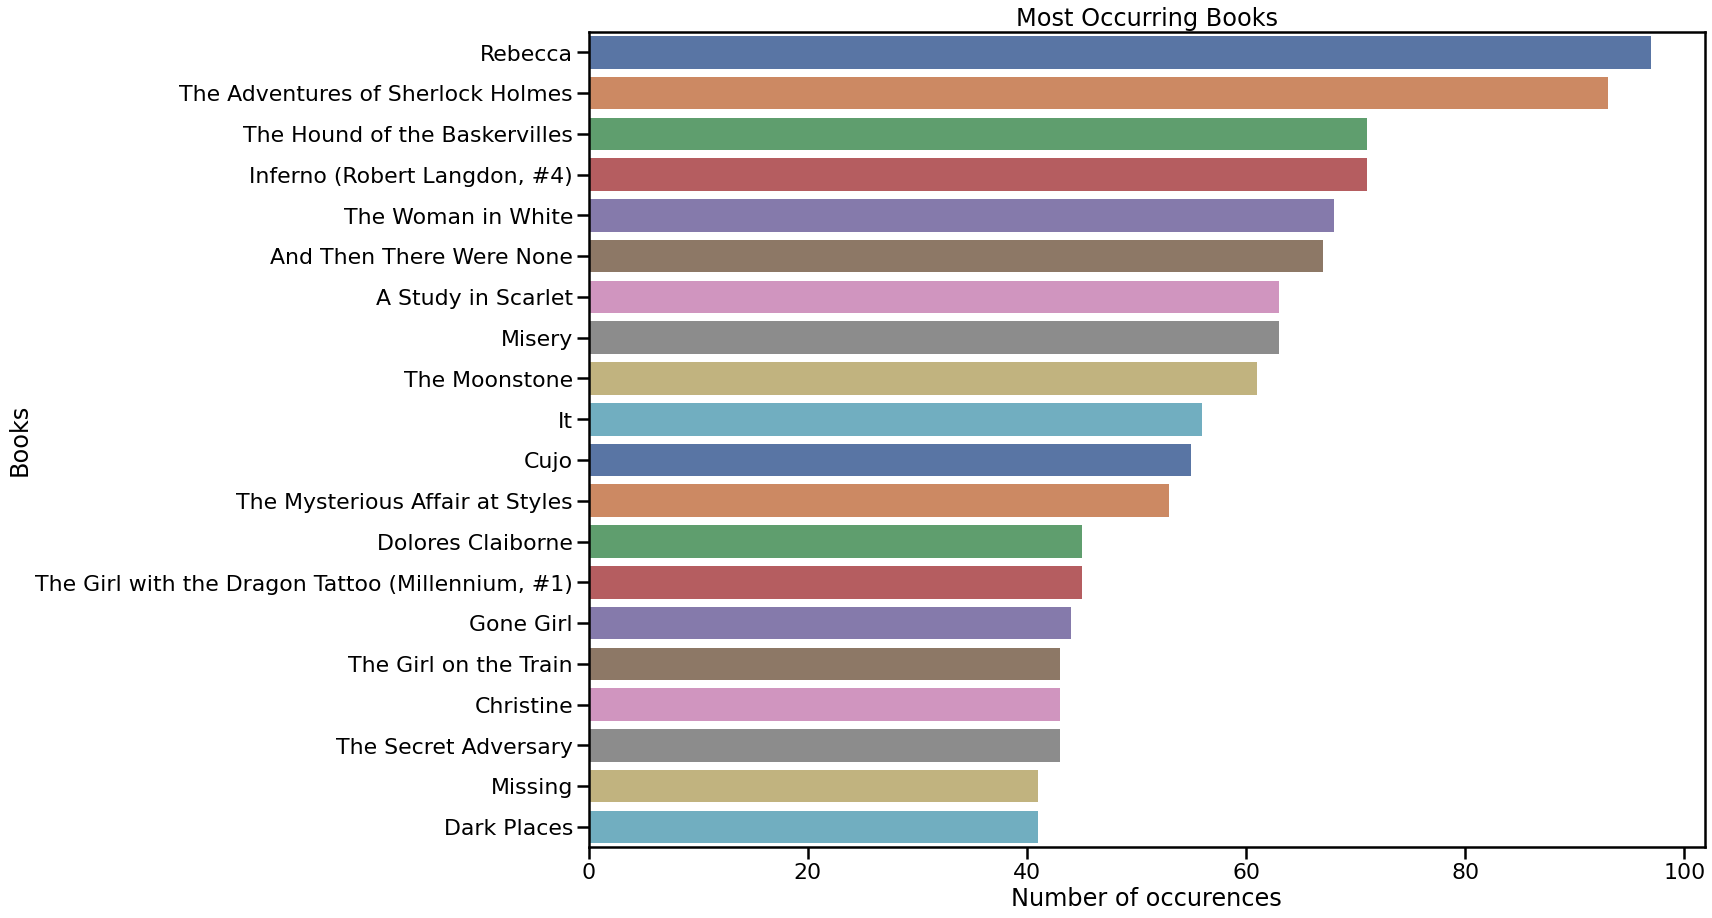

In [61]:
#Plotting Most Occuring Books
sns.set_context('poster')
plt.figure(figsize=(20,15))
top_books = books_df['title'].value_counts()[:20]
sns.barplot(x = top_books, y = top_books.index, palette='deep')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurences")
plt.ylabel("Books")
plt.show()

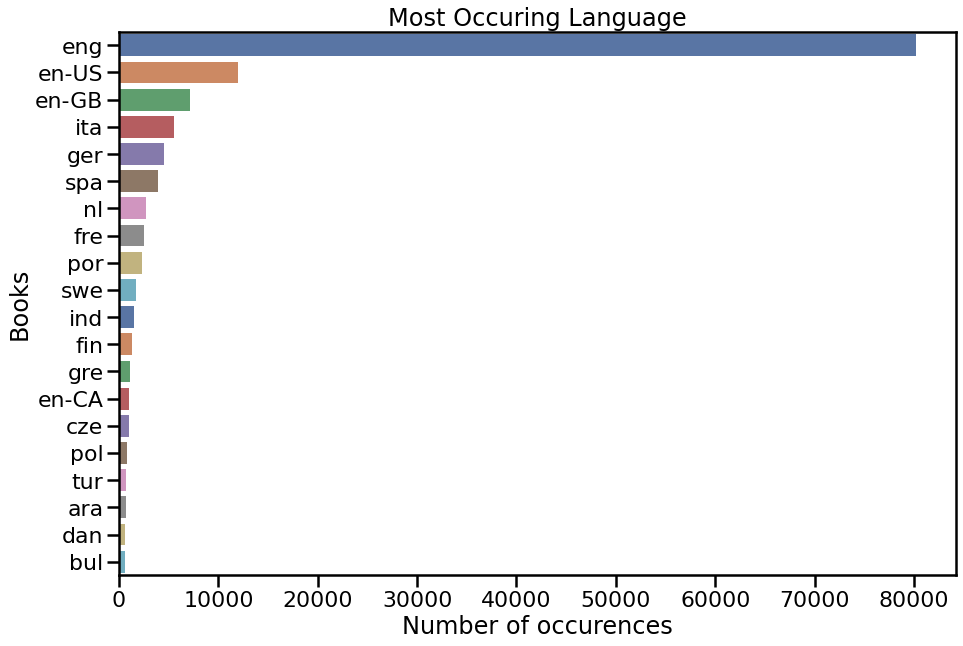

In [62]:
#Plotting Most Occuring Languages
sns.set_context('poster')
plt.figure(figsize=(15,10))
top_lang = books_df['language_code'].value_counts()[:20]
sns.barplot(x = top_lang, y = top_lang.index, palette='deep')
plt.title("Most Occuring Language")
plt.xlabel("Number of occurences")
plt.ylabel("Books")
plt.show()

In [92]:
sorted_books = books_df.sort_values(by='ratings_count', ascending=False).reset_index()

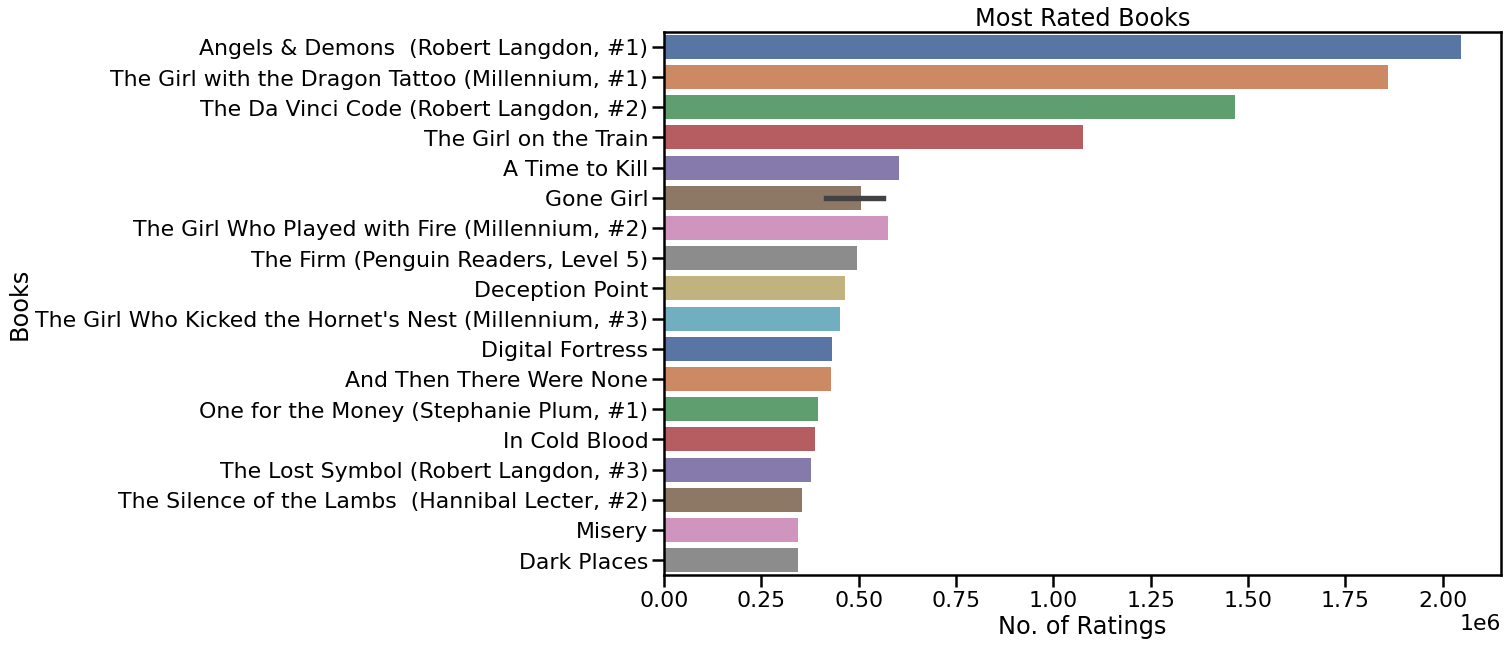

In [94]:
#Plotting Most Rated Books
sns.set_context('poster')
plt.figure(figsize=(15,10))
sns.barplot(x = list(sorted_books['ratings_count'][:20]), y = list(sorted_books['title'][:20]), palette='deep')
plt.title("Most Rated Books")
plt.ylabel("Books")
plt.xlabel("No. of Ratings")
plt.show()